<a href="https://colab.research.google.com/github/arfanrifqi/Eksplorasi-dan-Analisis-Data-COVID-19-/blob/main/Eksplorasi_dan_Analisis_Data_COVID_19_di_bengkulu_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [25]:
resp_bkl = requests.get('https://data.covid19.go.id/public/api/prov_detail_BENGKULU.json')

In [26]:
cov_bkl_raw = resp_bkl.json()

In [27]:
print(cov_bkl_raw['last_date'])

2022-03-04


In [28]:
print('\nJumlah total kasus COVID-19 di Provinsi Bengkulu : %d' %cov_bkl_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Provinsi Bengkulu : %f.2%%' %cov_bkl_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Provinsi Bengkulu : %f.2%%' %cov_bkl_raw['sembuh_persen'])
print('jumlah kesembuhan dari covid-19 di Provinsi Bengkulu : ', cov_bkl_raw['sembuh_dengan_tgl'])


Jumlah total kasus COVID-19 di Provinsi Bengkulu : 27640
Persentase kematian akibat COVID-19 di Provinsi Bengkulu : 1.754703.2%
Persentase tingkat kesembuhan dari COVID-19 di Provinsi Bengkulu : 83.835022.2%
jumlah kesembuhan dari covid-19 di Provinsi Bengkulu :  23172


In [34]:
cov_bkl_raw.keys()

dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

In [29]:
cov_bkl = pd.DataFrame(cov_bkl_raw['list_perkembangan'])
print('Info cov_bkl:\n', cov_bkl.info())
print('\nLima data teratas cov_bkl:\n', cov_bkl.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       704 non-null    int64
 1   KASUS                         704 non-null    int64
 2   MENINGGAL                     704 non-null    int64
 3   SEMBUH                        704 non-null    int64
 4   DIRAWAT_OR_ISOLASI            704 non-null    int64
 5   AKUMULASI_KASUS               704 non-null    int64
 6   AKUMULASI_SEMBUH              704 non-null    int64
 7   AKUMULASI_MENINGGAL           704 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  704 non-null    int64
dtypes: int64(9)
memory usage: 49.6 KB
Info cov_bkl:
 None

Lima data teratas cov_bkl:
          tanggal  KASUS  MENINGGAL  SEMBUH  DIRAWAT_OR_ISOLASI  \
0  1585612800000      1          1       0                   0   
1  1585699200000      0          0       0       

In [30]:
cov_bkl = pd.DataFrame(cov_bkl_raw['list_perkembangan'])

cov_bkl_tidy= (cov_bkl.drop(columns=[item for item in cov_bkl.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_bkl_tidy['tanggal'] = pd.to_datetime(cov_bkl_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_bkl_tidy.sample(5))

Lima data teratas:
        tanggal  kasus_baru  meninggal  sembuh
405 2021-05-10          18          0      53
411 2021-05-16           8          0      35
150 2020-08-28          24          0       2
453 2021-06-27          16          0      70
580 2021-11-01           7          0       0


<Figure size 432x288 with 0 Axes>

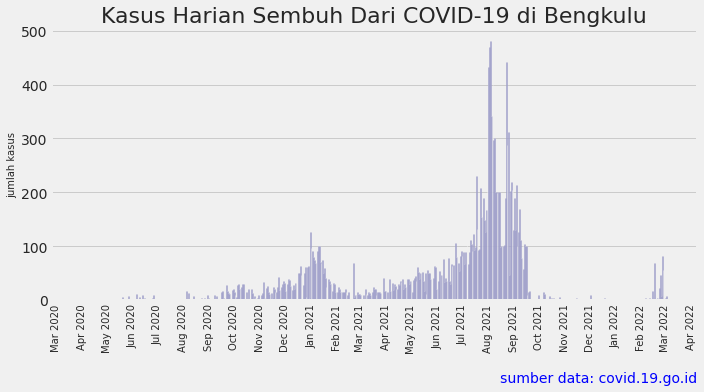

In [46]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(data=cov_bkl_tidy, x='tanggal', height='sembuh', color='navy')
ax.set_title('Kasus Harian Sembuh Dari COVID-19 di Bengkulu',
             fontsize=22)
ax.set_xlabel('', fontsize=10)
ax.set_ylabel('jumlah kasus', fontsize=10)
ax.text(1, -0.3, 'sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90, fontsize=10)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='x')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

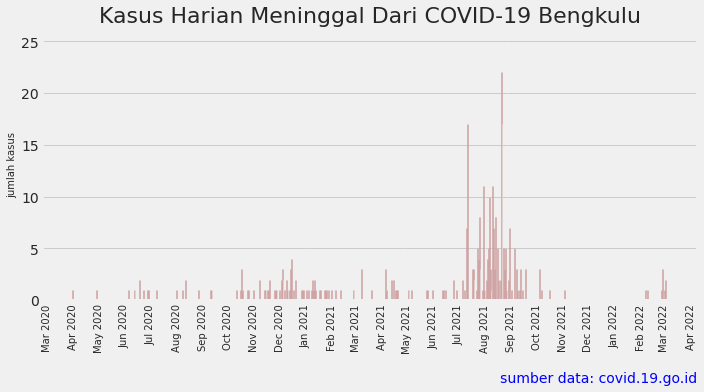

In [50]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(data=cov_bkl_tidy, x='tanggal', height='meninggal', color='darkred')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 Bengkulu',
             fontsize=22)
ax.set_xlabel('',fontsize=10)
ax.set_ylabel('jumlah kasus',fontsize=10)
ax.text(1, -0.3, 'sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90, fontsize=10)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='x')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

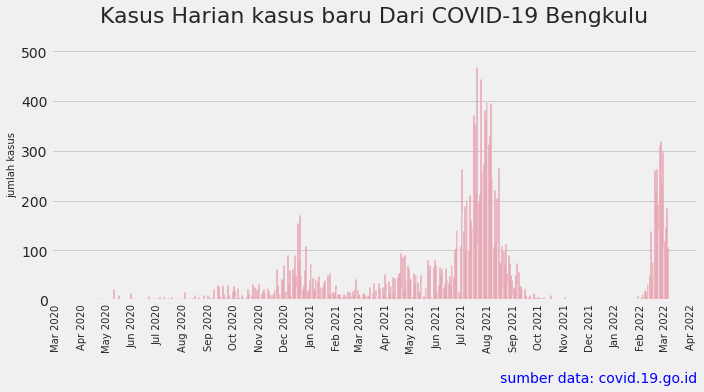

In [51]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(data=cov_bkl_tidy, x='tanggal', height='kasus_baru', color='crimson')
ax.set_title('Kasus Harian kasus baru Dari COVID-19 Bengkulu',
             fontsize=22)
ax.set_xlabel('',fontsize=10)
ax.set_ylabel('jumlah kasus',fontsize=10)
ax.text(1, -0.3, 'sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90, fontsize=10)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [35]:
cov_bkl_pekanan = (cov_bkl_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_bkl_pekanan['tahun'] = cov_bkl_pekanan['tanggal'].apply(lambda x: x.year)
cov_bkl_pekanan['pekan_ke'] = cov_bkl_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_bkl_pekanan = cov_bkl_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_bkl_pekanan.info())
print('\nsampel cov bengkulu pekanan:\n', cov_bkl_pekanan.sample(5))

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     101 non-null    int64
 1   pekan_ke  101 non-null    int64
 2   jumlah    101 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB
None

sampel cov bengkulu pekanan:
     tahun  pekan_ke  jumlah
64   2021        25     715
63   2021        24     364
16   2020        30      19
92   2022         1       0
33   2020        47     166


In [36]:
cov_bkl_akumulasi = cov_bkl_tidy[['tanggal']].copy()
cov_bkl_akumulasi['akumulasi_aktif'] = (cov_bkl_tidy['kasus_baru'] - cov_bkl_tidy['sembuh'] - cov_bkl_tidy['meninggal']).cumsum()
cov_bkl_akumulasi['akumulasi_sembuh'] = cov_bkl_tidy['sembuh'].cumsum()
cov_bkl_akumulasi['akumulasi_meninggal'] = cov_bkl_tidy['meninggal'].cumsum()
print(cov_bkl_akumulasi.tail())

       tanggal  akumulasi_aktif  akumulasi_sembuh  akumulasi_meninggal
699 2022-02-28             3441             23157                  482
700 2022-03-01             3559             23158                  483
701 2022-03-02             3700             23162                  485
702 2022-03-03             3878             23170                  485
703 2022-03-04             3983             23172                  485


<Figure size 432x288 with 0 Axes>

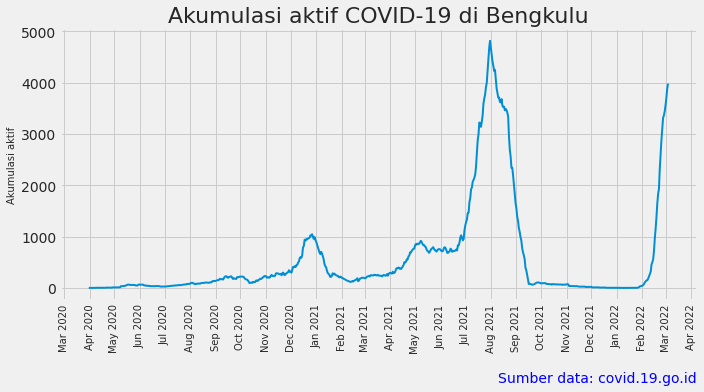

In [60]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,6))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_bkl_akumulasi, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Bengkulu',
             fontsize=22)
ax.set_xlabel('', fontsize=10)
ax.set_ylabel('Akumulasi aktif', fontsize=10)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90, fontsize=10)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

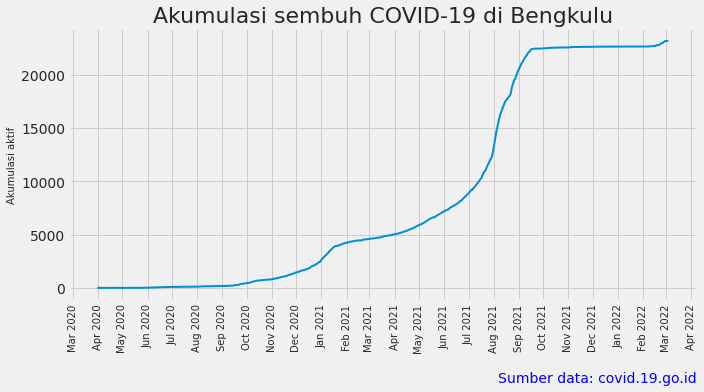

In [61]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,6))
ax.plot('tanggal', 'akumulasi_sembuh', data=cov_bkl_akumulasi, lw=2)

ax.set_title('Akumulasi sembuh COVID-19 di Bengkulu',
             fontsize=22)
ax.set_xlabel('', fontsize=10)
ax.set_ylabel('Akumulasi aktif', fontsize=10)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90, fontsize=10)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

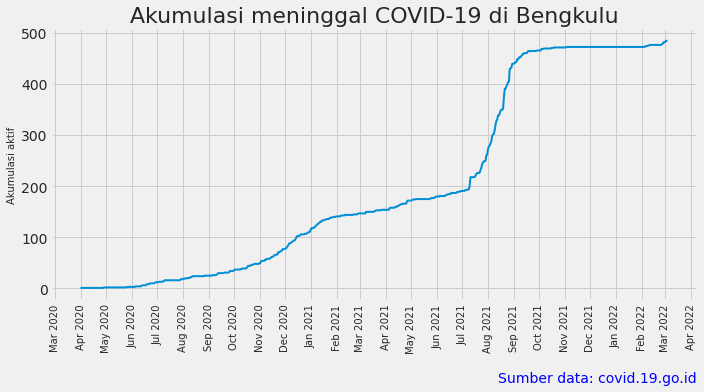

In [62]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,6))
ax.plot('tanggal', 'akumulasi_meninggal', data=cov_bkl_akumulasi, lw=2)

ax.set_title('Akumulasi meninggal COVID-19 di Bengkulu',
             fontsize=22)
ax.set_xlabel('', fontsize=10)
ax.set_ylabel('Akumulasi aktif', fontsize=10)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90, fontsize=10)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

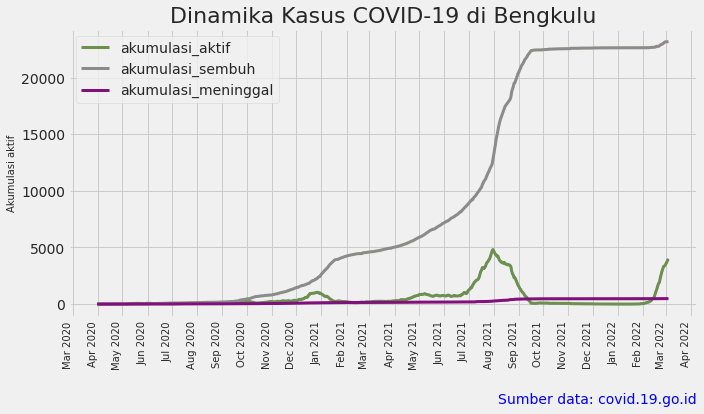

In [57]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,6))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_bkl_akumulasi, lw=2)
ax.plot('tanggal', 'akumulasi_meninggal', data=cov_bkl_akumulasi, lw=2)
ax.plot('tanggal', 'akumulasi_sembuh', data=cov_bkl_akumulasi, lw=2)
ax.set_title('Dinamika Kasus COVID-19 di Bengkulu',
             fontsize=22)
cov_bkl_akumulasi_ts = cov_bkl_akumulasi.set_index('tanggal')
cov_bkl_akumulasi_ts.plot(kind='line', ax=ax, lw=3)
ax.set_xlabel('', fontsize=10)
ax.set_ylabel('Akumulasi aktif', fontsize=10)
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90, fontsize=10)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(True)
plt.tight_layout()
plt.show()